2018 Oct 14<br>
Making sure I understand the behavior of residuals<br>

As you bin more and more residual points, Gaussian residuals $\sigma_{\rm n}$ should decline as
$$
\sigma_{\rm n} = \sigma_{\rm 1} n^{-1/2} \sqrt{m/\left( m - 1 \right)},
$$
where $\sigma_{\rm 1}$ is the intrinsic scatter, $n$ the number of points in each bin, and $m$ the number of bins.<br>

I want to make sure I understand what that all means.

In [76]:
%matplotlib inline

import numpy as np
from numpy.random import normal, rand
import matplotlib.pyplot as plt

from transit_utils import bindata

from emcee.autocorr import function

(0.00010001000100010001, 0.00010001000100010001)
0.00015015629652099713


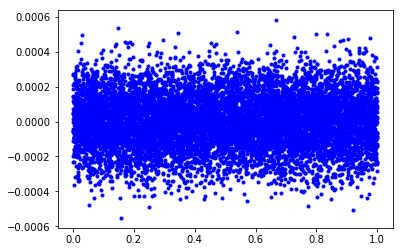

In [13]:
tot_num_points = 10000
scatter = 150e-6

# Arbitrary
time_spacing = 1./(tot_num_points - 1)
print(time[1] - time[0], time_spacing)
time = np.linspace(0, 1, tot_num_points)

normally_scattered_points = normal(scale=scatter, size=tot_num_points)
plt.plot(time, normally_scattered_points, 'b.')
print(np.std(normally_scattered_points))

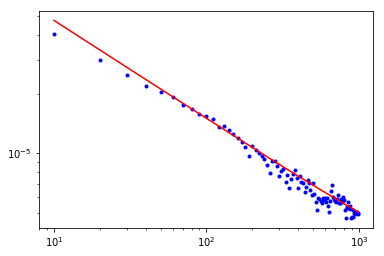

In [64]:
bin_sizes = np.arange(10, 1000, 10)
num_bins = tot_num_points/bin_sizes
binned_scatter = np.array([])

for i in range(len(bin_sizes)):
    binsize = bin_sizes[i]*time_spacing
    binned_time, binned_data, binned_err = bindata(time, normally_scattered_points, binsize)
    binned_scatter = np.append(binned_scatter, np.std(binned_data))

plt.loglog(bin_sizes, binned_scatter, 'b.')
plt.loglog(bin_sizes, scatter/np.sqrt(bin_sizes)*np.sqrt(num_bins/(num_bins - 1.)), color='red')

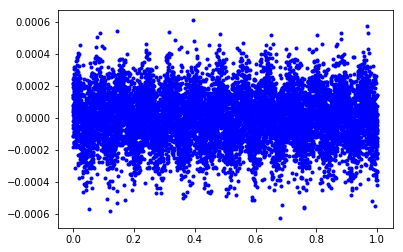

In [87]:
scaled_amplitude = 2.
amplitude = scatter/scaled_amplitude
period = time_spacing*(500.*rand() + 500.)

noisy_signal = amplitude*np.sin(2.*np.pi/period*(time - rand())) + normal(scale=scatter, size=len(time))
plt.plot(time, noisy_signal, 'b.')

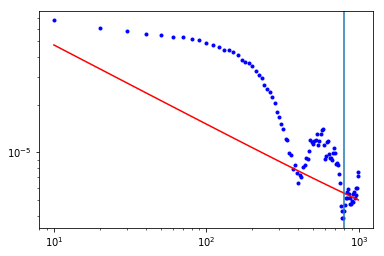

In [88]:
bin_sizes = np.arange(10, 1000, 10)
num_bins = tot_num_points/bin_sizes
binned_scatter = np.array([])

for i in range(len(bin_sizes)):
    binsize = bin_sizes[i]*time_spacing
    binned_time, binned_data, binned_err = bindata(time, noisy_signal, binsize)
    binned_scatter = np.append(binned_scatter, np.std(binned_data))

plt.loglog(bin_sizes, binned_scatter, 'b.')
plt.loglog(bin_sizes, scatter/np.sqrt(bin_sizes)*np.sqrt(num_bins/(num_bins - 1.)), color='red')
plt.axvline(period/time_spacing)

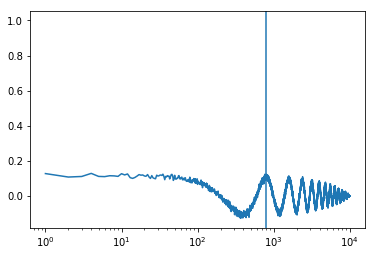

In [89]:
auto_corr = function(noisy_signal)

x = range(len(auto_corr))
plt.semilogx(x, auto_corr)
plt.axvline(period/time_spacing)